# Coding Challenge: Boeing Log Returns

In [7]:
import pandas as pd
import numpy as np
import yfinance as yf
pd.options.display.float_format = '{:,.6f}'.format

In [8]:
# Load Boeing data (same loading style as notebook 1)
start = "2014-10-01"
end = "2021-05-31"
symbol = "BA"

boeing_data = yf.download(symbol, start, end, multi_level_index=False)
boeing_data

/var/folders/f8/mtg4j9ld7738_4k47b8j8hd40000gn/T/ipykernel_83597/2073796371.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  boeing_data = yf.download(symbol, start, end, multi_level_index=False)
[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2014-10-01,108.406685,110.754471,108.093647,110.754471,5265200
2014-10-02,107.971909,109.171891,107.684956,108.171908,3204500
2014-10-03,109.876205,110.319677,108.397975,108.397975,3075900
2014-10-06,109.789261,110.597942,109.024053,110.510982,2681000
2014-10-07,107.232780,109.145786,107.206695,109.145786,3554900
...,...,...,...,...,...
2021-05-24,237.440002,238.500000,232.600006,235.139999,10106000
2021-05-25,240.740005,243.779999,239.229996,240.000000,12908000
2021-05-26,241.369995,242.490005,239.869995,241.699997,7240200


## 1) Calculate Daily Log Returns for Boeing

In [9]:
boeing_data["Log_Return"] = np.log(boeing_data["Close"] / boeing_data["Close"].shift(1))
boeing_data[["Close", "Log_Return"]].head()

,Close,Log_Return
Date,,
2014-10-01,108.406685,NaN
2014-10-02,107.971909,-0.004019
2014-10-03,109.876205,0.017483
2014-10-06,109.789261,-0.000792
2014-10-07,107.232780,-0.023561


## 2) Metrics from Boeing Log Returns

In [10]:
trading_days_per_year = 252

# Investment Multiple from log returns
total_log_return = boeing_data["Log_Return"].sum()
investment_multiple = np.exp(total_log_return)

# CAGR from average daily log return (assuming 252 trading days)
average_daily_log_return = boeing_data["Log_Return"].mean()
cagr = np.exp(average_daily_log_return * trading_days_per_year) - 1

# Normalized price series (Base = 1) built from cumulative log returns
boeing_data["Cumulative_Log_Return"] = boeing_data["Log_Return"].fillna(0).cumsum()
boeing_data["Normalized_Price_Base_1"] = np.exp(boeing_data["Cumulative_Log_Return"])

summary = pd.DataFrame({
    "Metric": [
        "Investment Multiple",
        "CAGR (252 trading days)"
    ],
    "Value": [
        investment_multiple,
        cagr
    ],
    "Interpretation": [
        f"$1 invested became ${investment_multiple:.4f} over the full period.",
        f"Annualized return is {cagr:.2%} per year (based on 252 trading days)."
    ]
})

summary

,Metric,Value,Interpretation
0,Investment Multiple,2.278642,$1 invested became $2.2786 over the full period.
1,CAGR (252 trading days),0.131825,Annualized return is 13.18% per year (based on...


In [11]:
boeing_data[["Close", "Log_Return", "Normalized_Price_Base_1"]].head(10)

,Close,Log_Return,Normalized_Price_Base_1
Date,,,
2014-10-01,108.406685,NaN,1.000000
2014-10-02,107.971909,-0.004019,0.995989
2014-10-03,109.876205,0.017483,1.013556
2014-10-06,109.789261,-0.000792,1.012754
2014-10-07,107.232780,-0.023561,0.989171
2014-10-08,108.676231,0.013371,1.002486
2014-10-09,106.745834,-0.017922,0.984679
2014-10-10,105.650192,-0.010317,0.974573
2014-10-13,104.737167,-0.008680,0.966150


<Axes: title={'center': 'Boeing Normalized Price (Base = 1)'}, xlabel='Date'>

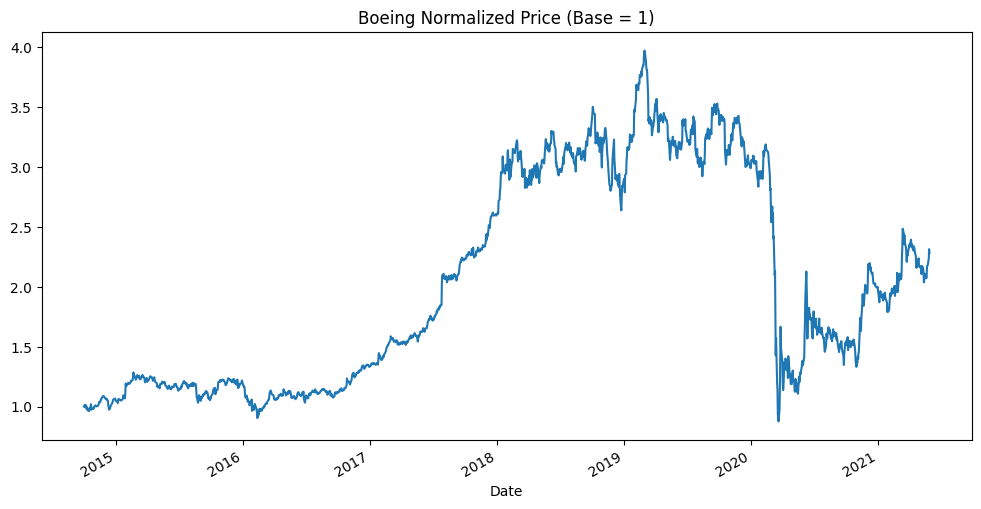

In [12]:
boeing_data["Normalized_Price_Base_1"].dropna().plot(figsize=(12, 6), title="Boeing Normalized Price (Base = 1)")